In [1]:
from google.colab import files
uploaded = files.upload()

Saving Startups.csv to Startups (1).csv


In [8]:
import pandas as pd

In [9]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Startups.csv']))

In [ ]:
df2

In [60]:
#@title 1. Show datatype for each variable and summary of the variables?

In [18]:
print(df2.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [16]:
print(df2.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [27]:
print(df2.min()) 
print(df2.max())

R&D Spend                 0.0
Administration       51283.14
Marketing Spend           0.0
State              California
Profit                14681.4
dtype: object
R&D Spend           165349.2
Administration     182645.56
Marketing Spend     471784.1
State               New York
Profit             192261.83
dtype: object


In [31]:
#@title 2. Show the descriptive statistic for the data frame?

In [20]:
print(df2['R&D Spend'].describe())

count        50.000000
mean      73721.615600
std       45902.256482
min           0.000000
25%       39936.370000
50%       73051.080000
75%      101602.800000
max      165349.200000
Name: R&D Spend, dtype: float64


In [21]:
print(df2['Administration'].describe())

count        50.000000
mean     121344.639600
std       28017.802755
min       51283.140000
25%      103730.875000
50%      122699.795000
75%      144842.180000
max      182645.560000
Name: Administration, dtype: float64


In [23]:
print(df2['Marketing Spend'].describe())

count        50.000000
mean     211025.097800
std      122290.310726
min           0.000000
25%      129300.132500
50%      212716.240000
75%      299469.085000
max      471784.100000
Name: Marketing Spend, dtype: float64


In [34]:
print(df2['State'].describe())

count           50
unique           3
top       New York
freq            17
Name: State, dtype: object


In [25]:
print(df2['Profit'].describe())

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64


In [61]:
#@title 3.Create histogram and boxplot for independent variables to understand the distribution and skewness (mention which one has right or left skewness or has normal distribution)?

In [35]:
import matplotlib.pyplot as plt

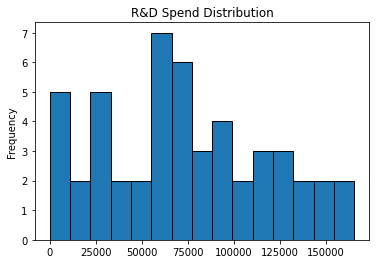

In [42]:
df2['R&D Spend'].plot(kind='hist',bins=15,title='R&D Spend Distribution', edgecolor = "k")

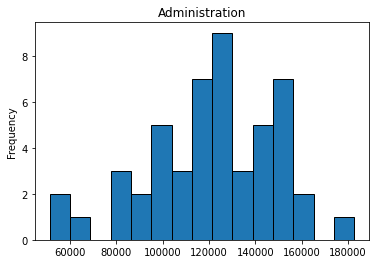

In [44]:
df2['Administration'].plot(kind='hist',bins=15,title='Administration', edgecolor = "k")

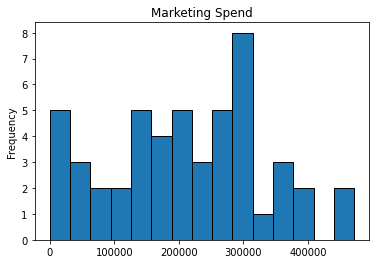

In [45]:
df2['Marketing Spend'].plot(kind='hist',bins=15,title='Marketing Spend', edgecolor = "k")

[]

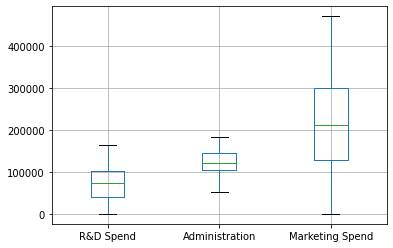

In [56]:
boxplot = df2.boxplot(column = ["R&D Spend", "Administration", "Marketing Spend"])
boxplot.plot()

In [67]:
#@markdown R&D Spend appears to be slightly skewed to the right, but mostly normally distributed

#@markdown Administration appears to be skewed to the left

#@markdown Marketing Spend appears to be slightly skewed to the left, but mostly normally distributed


In [ ]:
#@title 4. Which one of independent variables has the highest variability?

R&D Spend          2.107017e+09
Administration     7.849973e+08
Marketing Spend    1.495492e+10
Profit             1.624588e+09
dtype: float64


<ipython-input-69-ce9ea069b355>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variability = df2.var()


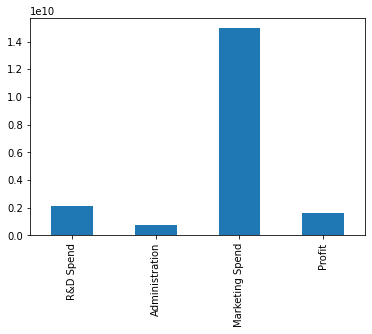

In [69]:
variability = df2.var()
print(variability)
variability.plot.bar()

In [ ]:
#@markdown Marketing Spend had the greatest variability

In [ ]:
#@title 5. Which one of these independent variables is positively correlated with dependent variables?

In [80]:
import seaborn as sns

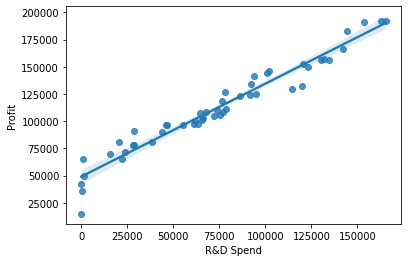

In [82]:
sns.regplot(x=df2["R&D Spend"], y=df2["Profit"])

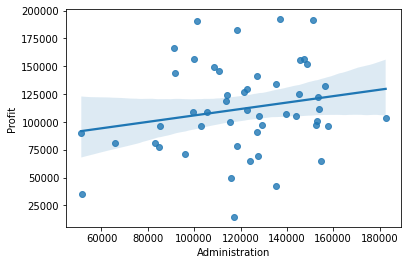

In [83]:
sns.regplot(x=df2["Administration"], y=df2["Profit"])

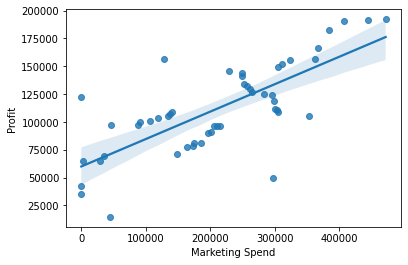

In [84]:
sns.regplot(x=df2["Marketing Spend"], y=df2["Profit"])

In [85]:
#@markdown R&D spend is positively correlated with Profit

In [88]:
#@title 6. Which one of the States has highest profit?

In [99]:
st = df2.groupby("State")["Profit"].max()
st

State
California    191792.06
Florida       191050.39
New York      192261.83
Name: Profit, dtype: float64

In [ ]:
#@markdown New York has the highest profit

In [100]:
#@title 7. Will a company that spends more on marketing perform better (higher profit) or a company spends less on marketing?

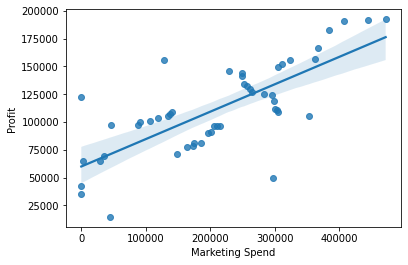

In [103]:
sns.regplot(x=df2["Marketing Spend"], y=df2["Profit"])


In [104]:
#@markdown there is somewhat a positve correlation between marketing spend and profit, so yes generally a company that spends more on marketing performs better. 

In [ ]:
#@title 8. Create pairwise comparison graph.

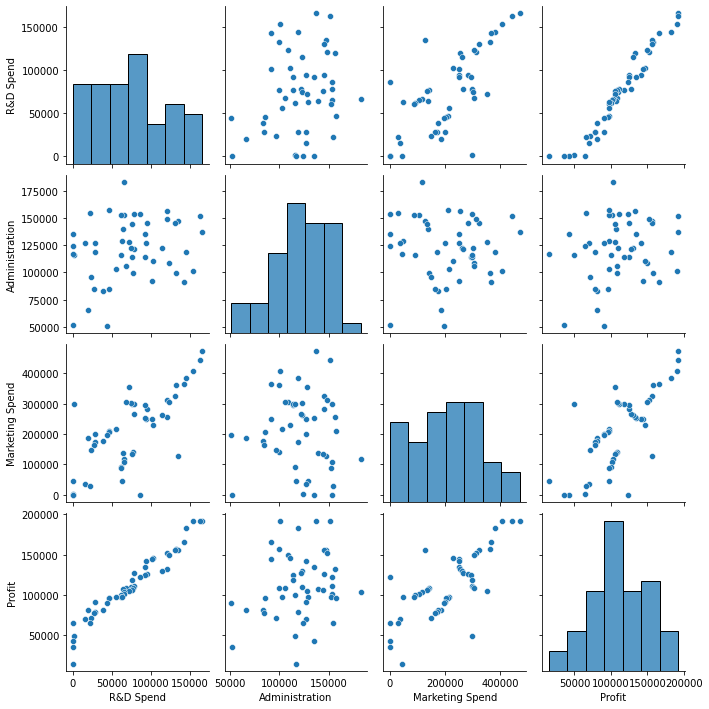

In [106]:
sns.pairplot(df2)
